In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [45]:
off_off = pd.read_csv(r'C:\Users\yuhan\work\microspheres\measurements\scattering\tuning_off_laser_off.csv', sep=',',header=1)
off_on  = pd.read_csv(r'C:\Users\yuhan\work\microspheres\measurements\scattering\tuning_off_laser_on.csv', sep=',',header=1)
on_on   = pd.read_csv(r'C:\Users\yuhan\work\microspheres\measurements\scattering\tuning_on_laser_on.csv', sep=',',header=1)
on_on_triangle = pd.read_csv(r'C:\Users\yuhan\work\microspheres\measurements\scattering\laser_on_tuning_on_triangle_20s.csv', sep=',',header=1)

In [46]:
# index, v_temperature, v_scattered
arr_off_off = off_off.values.T[0:3]
arr_off_on = off_on.values.T[0:3]
arr_on_on = on_on.values.T[0:3]
arr_on_on_triangle = on_on_triangle.values.T[0:3]

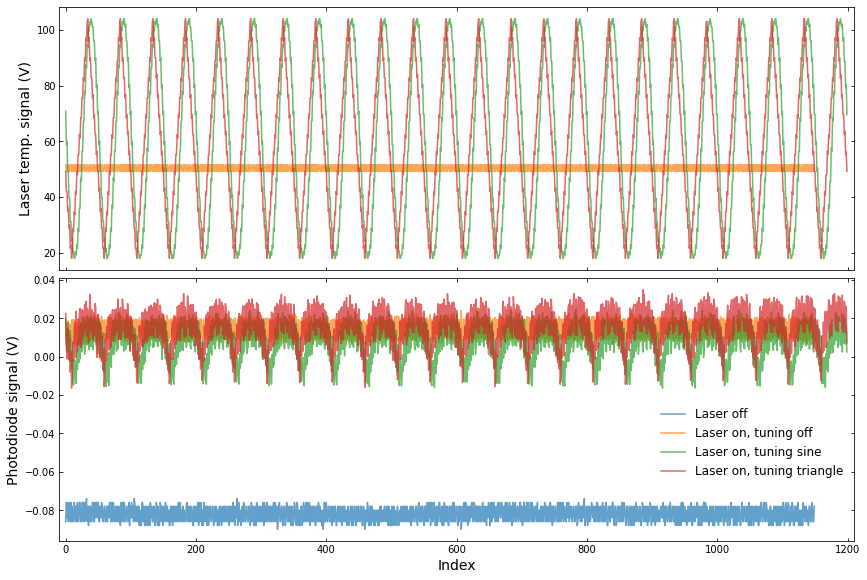

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lab = [r'Laser off', r'Laser on, tuning off', r'Laser on, tuning sine', r'Laser on, tuning triangle']
for idx, arr in enumerate([arr_off_off, arr_off_on, arr_on_on, arr_on_on_triangle]):
    i, v_t, v_s = arr[0], arr[1], arr[2]
    
    if arr is arr_off_off:
        axes[0].plot(i, v_t, alpha=0)
    else:
        axes[0].plot(i, v_t, alpha=0.7)
    axes[1].plot(i, v_s, label=lab[idx], alpha=0.7)
    
for ax in axes:
    ax.set_xlim(-10, 1210)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    
axes[0].set_xticklabels([])
axes[0].set_ylabel('Laser temp. signal (V)', fontsize=14)
axes[1].legend(frameon=False, loc='lower right', bbox_to_anchor=(1,0.2), fontsize=12)
axes[1].set_xlabel('Index', fontsize=14)
axes[1].set_ylabel('Photodiode signal (V)', fontsize=14)

fig.tight_layout(pad=0.5)
plt.show()

In [48]:
def get_error_percentile(arr):
    """Median and upper/lower error at 97.5% and 2.5%"""
    m, u, l = np.percentile(arr, [50, 97.5, 2.5])
    err_u, err_l = u-m , m-l
    
    return m, err_u, err_l

In [49]:
def get_sig(df, method='percentile'):
    val = df.sort_values(by=['VOLT']).values.T
    v_t_sorted, v_m_sorted = val[1], val[2]
    
    # Find indices for splitting from sorted values
    split_idx = np.flatnonzero(np.diff(v_t_sorted)>0) + 1
    out = np.split(v_m_sorted, split_idx)
    
    v_t = np.unique(v_t_sorted)
    v_m = np.empty_like(v_t)
    v_m_err_u = np.empty_like(v_t)
    v_m_err_l = np.empty_like(v_t)
    for i, arr in enumerate(out):
        if method == 'percentile':
            v_m[i], v_m_err_u[i], v_m_err_l[i] = get_error_percentile(arr)
        elif method == 'std':
            v_m[i] = np.mean(arr)
            v_m_err_u[i] = np.std(arr)
            v_m_err_l[i] = v_m_err_u[i]
        
    return v_t, v_m, v_m_err_u, v_m_err_l

In [50]:
t, m, err_u, err_l = get_sig(on_on, method='percentile')
t_t, m_t, err_u_t, err_l_t = get_sig(on_on_triangle, method='percentile')
t_0, m_0, err_u_0, err_l_0 = get_sig(off_on, method='percentile') # no tuning

t_, m_, err_u_, err_l_ = get_sig(on_on, method='std')
t_t_, m_t_, err_u_t_, err_l_t_ = get_sig(on_on_triangle, method='std')
t_0_, m_0_, err_u_0_, err_l_0_ = get_sig(off_on, method='std')

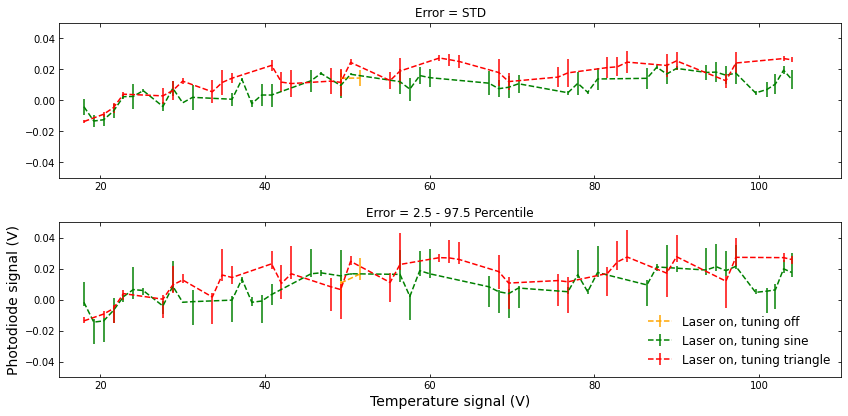

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# std method
axes[0].errorbar(t_, m_, yerr=[err_u_, err_l_], ls='--', color='green')
axes[0].errorbar(t_0_, m_0_, yerr=[err_u_0_, err_l_0_], ls='--', color='orange')
axes[0].errorbar(t_t_, m_t_, yerr=[err_u_t_, err_l_t_], ls='--', color='red')
axes[0].set_title('Error = STD')

# percentile method
axes[1].errorbar(t_0, m_0, yerr=[err_u_0, err_l_0], ls='--', color='orange', label='Laser on, tuning off')
axes[1].errorbar(t, m, yerr=[err_u, err_l], ls='--', color='green', label='Laser on, tuning sine')
axes[1].errorbar(t_t, m_t, yerr=[err_u_t, err_l_t], ls='--', color='red', label='Laser on, tuning triangle')
axes[1].set_title('Error = 2.5 - 97.5 Percentile')

axes[1].set_xlabel('Temperature signal (V)', fontsize=14)
axes[1].set_ylabel('Photodiode signal (V)', fontsize=14)

for ax in axes:
    ax.set_xlim(15, 110)
    ax.set_ylim(-0.05, 0.05)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    
axes[1].legend(frameon=False, loc='lower right', fontsize=12)
fig.tight_layout(pad=1.5)